In [7]:
from math import dist

data = []
with open("data/mist.txt") as F:
    F.readline()
    for s in F:
        t, hum, mist = s.strip().split(";")
        data.append((float(t), int(hum), int(mist)))
data = [(t, hum, mist)
        for t, hum, mist in data
        if -80 <= t <= 50 and
        0 <= hum <= 1000 and
        mist in [0, 1]]

tNew = float(input("Temperature: "))
hNew = int(input("Humidity: "))
minDist = float(input("inf: "))
for t, hum, mist in data:
    delta = dist((t, hum), (tNew, hNew))
    if delta < minDist:
        minDist = delta
        result = mist
print("Mist" if result else "No mist")
K = 7
dataSort = data[:]
for t0, t1, mist0 in data:
    dataSort.sort(key = lambda d:
        dist((d[0], d[1]), (t0, h0)))
    mist = [mist
            for t, h, mist in dataSort[1:k+1]]
    if mist.count(mist0) == 0: print(t0, h0, mist0)


No mist


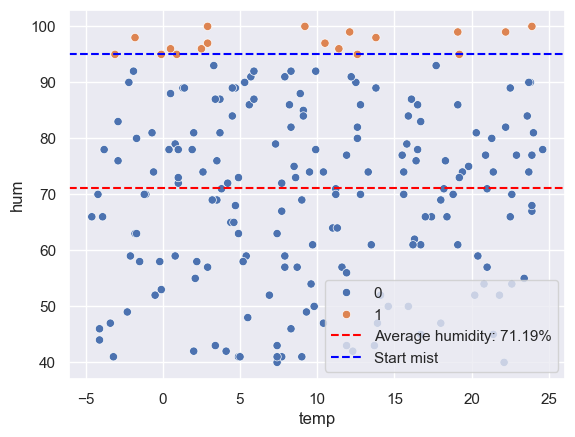

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="darkgrid")
column_names = ["temp", "hum", "mist"]
df = pd.read_csv(
    "data/mist.txt", sep=";",
    header=None, names=column_names).head(200)
sns.scatterplot(data=df, x="temp", y="hum", hue="mist")
average_humidity = df["hum"].mean()
plt.axhline(
    y=average_humidity,
    color="red", linestyle="--",
    label=f"Average humidity: {average_humidity:.2f}%"
)
mist = df[df["mist"] == 1]
plt.axhline(
    y=mist["hum"].min(),
    color="blue", linestyle="--",
    label="Start mist"
)
plt.legend()

In [15]:
clasters = [[],[]]
with open("data/demo_2025_27_А.txt", 'r') as F:
    F.readline()
    for line in F:
        x, y = map(float, line.replace(',', '.').split())
        clasters[int(y > 3)].append((x, y))

In [17]:
def getCentroid(cluster):
    minS = float("inf")
    point = (0, 0)
    for i in range(len(cluster)-1):
        smDinstances = 0
        for j in range(len(cluster)):
            smDinstances += dist(cluster[i], cluster[j])
        if smDinstances < minS:
            minS = smDinstances
            point = cluster[i]
    return point

In [20]:
with open("data/demo_2025_27_А.txt", 'r') as F:
    F.readline()
    cluster1 = []; cluster2 = []
    for p in F:
        x, y = map(float, p.replace(',', '.').split())
        if y < 3:
            cluster1.append((x, y))
        else:
            cluster2.append((x, y))
centroid1, centroid2 = getCentroid(cluster1), getCentroid(cluster2)
print(int((centroid1[0] + centroid2[0]) / 2 * 10000))
print(int((centroid1[1] + centroid2[1]) / 2 * 10000))

10738
30730
